In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
downloaded = drive.CreateFile({'id':'13y28pFPbulmcrZHh77kq3fFJXxYfxnch'}) # replace the id with id of file you want to access
downloaded.GetContentFile('train.csv') 
downloaded = drive.CreateFile({'id':'1UmL3P6Ig2Gq0DoyGJRVfQRYCQbSs7SMS'}) # replace the id with id of file you want to access
downloaded.GetContentFile('test.csv')

In [4]:
downloaded = drive.CreateFile({'id':'1xb6RClnre3BF_U-LawftSpMP_Ej37j4f'}) # replace the id with id of file you want to access
downloaded.GetContentFile('sample.csv')

In [5]:
import pandas as pd
train=pd.read_csv('train.csv') 
test=pd.read_csv('test.csv')

In [6]:
train.head()
sample=pd.read_csv('sample.csv')

In [7]:
train.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

(array([158166.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,   1405.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

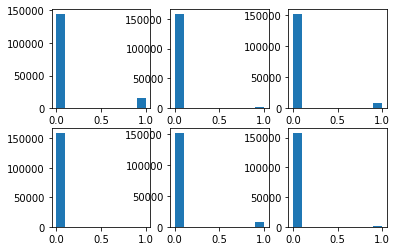

In [8]:
import matplotlib.pyplot as plt

plt.subplot(2, 3, 1)
plt.hist(train['toxic'],bins=10)

plt.subplot(2, 3, 2)
plt.hist(train['severe_toxic'],bins=10)

plt.subplot(2, 3, 3)
plt.hist(train['obscene'],bins=10)

plt.subplot(2, 3, 4)
plt.hist(train['threat'],bins=10)

plt.subplot(2, 3, 5)
plt.hist(train['insult'],bins=10)

plt.subplot(2, 3, 6)
plt.hist(train['identity_hate'],bins=10)

Text(0, 0.5, 'frequency')

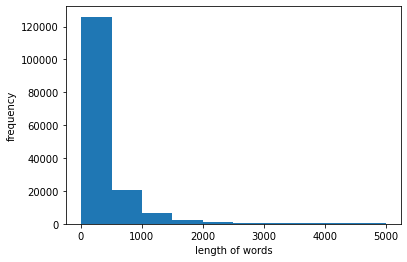

In [9]:
leng=0
length=[(leng+len(x)) for x in train['comment_text']]
plt.hist(length,bins=10)
plt.xlabel('length of words')
plt.ylabel('frequency')

In [10]:
import pandas as pd
col1="toxic"
col2="severe_toxic"
confusion_matrix = pd.crosstab(train[col1], train[col2])
print("Confusion matrix between toxic and severe toxic:")
print(confusion_matrix)
# new_corr=cramers_corrected_stat(confusion_matrix)
# print("The correlation between Toxic and Severe toxic using Cramer's stat=",new_corr)

Confusion matrix between toxic and severe toxic:
severe_toxic       0     1
toxic                     
0             144277     0
1              13699  1595


In [11]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import nltk
nltk.download('wordnet')

stop_words=set(stopwords.words("english"))
lemmatizer=WordNetLemmatizer()

def clean_text(text):
  text = re.sub(r'[^\w\s]','',text, re.UNICODE)
  text = text.lower()
  text = [lemmatizer.lemmatize(token) for token in text.split(" ")]
  text = [lemmatizer.lemmatize(token, "v") for token in text]
  text = [word for word in text if not word in stop_words]
  text = " ".join(text)
  return text

train['Processed_Reviews'] = train.comment_text.apply(lambda x: clean_text(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [12]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,Processed_Reviews
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanation\nwhy edit make username hardcore m...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,daww match background colour im seemingly stic...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man im really try edit war guy constantly ...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,\nmore\ni cant make real suggestion improvemen...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,sir hero chance remember page thats


In [ ]:
# max_features = 20000 
# maxlen = 100 

# list_sentences_train = train["comment_text"].fillna("_na_").values
# list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
# y = train[list_classes].values
# list_sentences_test = test["comment_text"].fillna("_na_").values

# tokenizer = Tokenizer(num_words=max_features)
# tokenizer.fit_on_texts(list(list_sentences_train))
# list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
# list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)
# X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
# X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [ ]:
# inp = Input(shape=(maxlen,))
# x = Embedding(max_features, embed_size)(inp)
# x = Bidirectional(LSTM(50, return_sequences=True, dropout=0.1, recurrent_dropout=0.1))(x)
# x = GlobalMaxPool1D()(x)
# x = Dense(50, activation="relu")(x)
# x = Dropout(0.1)(x)
# x = Dense(6, activation="sigmoid")(x)
# model = Model(inputs=inp, outputs=x)
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# model.fit(X_t, y, batch_size=1024, epochs=1, validation_split=0.1);

In [ ]:
# y_test = model.predict([X_te], batch_size=1024, verbose=1)
# sample[list_classes] = y_test

In [ ]:
# sample[list_classes] = y_test

In [14]:
train.Processed_Reviews.apply(lambda x: len(x.split(" "))).mean()

38.0228048956264

In [15]:
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = train[list_classes].values

In [16]:
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model,Sequential
from keras.layers import Dense,Input,LSTM,Embedding,Dropout,Activation,GRU,Flatten
from keras.layers import Bidirectional,GlobalMaxPool1D
from keras.layers import Convolution1D
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.regularizers import l2


max_features=20000
tokenizer=Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(train['Processed_Reviews'])
list_tokenized_train=tokenizer.texts_to_sequences(train['Processed_Reviews'])


max_len=50
x_train=pad_sequences(list_tokenized_train,maxlen=max_len)
y_train=y

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.1,random_state=42)

embed_size = 128
# model = Sequential()
# model.add(Embedding(max_features, embed_size))
# model.add(Bidirectional(LSTM(32, return_sequences = True)))
# model.add(GlobalMaxPool1D())
# model.add(Dense(20, activation="relu"))
# model.add(Dropout(0.05))
# model.add(Dense(6, activation="sigmoid"))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# embedding_matrix = np.random.normal(0.020940498, 0.6441043, (nb_words, embed_size))

model=Sequential()
model.add(Embedding(max_features, embed_size))
model.add(Bidirectional(LSTM(50, return_sequences=True, dropout=0.1, recurrent_dropout=0.1)))
model.add(GlobalMaxPool1D())
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(6, activation="sigmoid",kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

batch_size=1024
epochs=2
model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test))

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 143613 samples, validate on 15958 samples
Epoch 1/2
143613/143613 [==============================] - 158s 1ms/step - loss: 0.2915 - accuracy: 0.9336 - val_loss: 0.1721 - val_accuracy: 0.9641
Epoch 2/2
143613/143613 [==============================] - 155s 1ms/step - loss: 0.1137 - accuracy: 0.9728 - val_loss: 0.0789 - val_accuracy: 0.9801


In [ ]:


# inp = Input(shape=(maxlen,))
# x = Embedding(max_features, embed_size, weights=[embedding_matrix])(inp)
# x = Bidirectional(LSTM(50, return_sequences=True, dropout=0.1, recurrent_dropout=0.1))(x)
# x = GlobalMaxPool1D()(x)
# x = Dense(50, activation="relu")(x)
# x = Dropout(0.1)(x)
# x = Dense(6, activation="sigmoid")(x)
# model = Model(inputs=inp, outputs=x)
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 100)         71600     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 306       
Total params: 2,636,956
Trainable params: 2,636,956
Non-trainable params: 0
____________________________________________

In [18]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [19]:
test["comment_text"]=test.comment_text.apply(lambda x: clean_text(x))
test.head()

,id,comment_text
0,00001cee341fdb12,yo bitch ja rule succesful youll ever whats ha...
1,0000247867823ef7,rfc \n\n title fine imo
2,00013b17ad220c46,\n\n source \n\n zawe ashton lapland
3,00017563c3f7919a,look back source information update wa correct...
4,00017695ad8997eb,dont anonymously edit article


In [20]:
max_features=6000
tokenizer=Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(test['comment_text'])
list_tokenized_train=tokenizer.texts_to_sequences(test['comment_text'])


max_len=50
x_test=pad_sequences(list_tokenized_train,maxlen=max_len)
y_test = model.predict([x_test], batch_size=100, verbose=1)

153164/153164 [==============================] - 46s 303us/step


In [21]:
sample[list_classes] = y_test

In [32]:
sample.head(630)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.029106,0.001860,0.008069,0.001805,0.007728,0.002905
1,0000247867823ef7,0.016677,0.001768,0.005609,0.001886,0.005529,0.002740
2,00013b17ad220c46,0.073386,0.005484,0.021978,0.003947,0.019771,0.006797
3,00017563c3f7919a,0.016488,0.001510,0.005206,0.001680,0.005216,0.002449
4,00017695ad8997eb,0.010906,0.001304,0.003826,0.001543,0.003872,0.002151
...,...,...,...,...,...,...,...
644,0113b73e0b5168d8,0.011852,0.001368,0.003984,0.001556,0.004045,0.002224
645,0113dcc1d0620954,0.087818,0.004463,0.024383,0.003809,0.021819,0.006516
646,0113e474b8eb9407,0.005954,0.000817,0.001985,0.001136,0.002073,0.001441
647,0114509409588767,0.051776,0.002731,0.012430,0.002441,0.011419,0.004055


In [ ]:
ids = sample['id'].str()

submission = pd.DataFrame({'id': ids, 'toxic':sample['toxic'],'severe_toxic':sample['severe_toxic'],'obscene':sample['obscene'],'threat':sample['threat'],'insult':sample['insult'],'identity_hate':sample['identity_hate']})

In [26]:
submission.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.029106,0.001860,0.008069,0.001805,0.007728,0.002905
1,0000247867823ef7,0.016677,0.001768,0.005609,0.001886,0.005529,0.002740
2,00013b17ad220c46,0.073386,0.005484,0.021978,0.003947,0.019771,0.006797
3,00017563c3f7919a,0.016488,0.001510,0.005206,0.001680,0.005216,0.002449
4,00017695ad8997eb,0.010906,0.001304,0.003826,0.001543,0.003872,0.002151


In [34]:
sample.to_csv("sample.csv")

In [35]:
sample.shape

(153164, 7)

In [ ]:
from google.colab import files
files.download("submission.csv")